#Predicting Sign Language Digits using CNNs
###Abstract

This notebook aims to classify various images of sign language digits. We make use of Convolutional Neural Network with Keras and Tensorflow. We use a dataset that consists of images of sign language digits collated and created by Turkey Ankara Ayrancı Anadolu High School Students. The examples of the dataset and the original dataset is available at https://github.com/ardamavi/Sign-Language-Digits-Dataset.
As for the scope of this notebook, we use a preprocessed version of this data set available at Kaggle at https://www.kaggle.com/ardamavi/sign-language-digits-dataset. 
We will be training a Convolutional Neural Network to accurately classify these images into their respective digits, and will attempt to observe changes to accuracy and other metrics while changing and tweaking


1. Network Architecture
2. Number of Epochs
3. Network Initialization
4. Activation Function
5. Cost Function
6. Gradient Estimation

In [ ]:
#Importing the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will load the preprocessed dataset available at Kaggle in the form of NumPy arrays. We will also display a few using imshow() to check if our dataset loaded correctly.

(-0.5, 63.5, 63.5, -0.5)

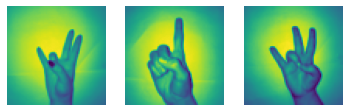

In [ ]:
x = np.load('drive/My Drive/DataScience Engg methods and tools/X.npy')
y = np.load('drive/My Drive/DataScience Engg methods and tools/Y.npy')
img_size = 64
plt.subplot(1, 3, 1)
plt.imshow(x[520].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(x[900].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(x[600].reshape(img_size, img_size))
plt.axis('off')

In [ ]:
print(y.max())
print(y.min())
print(y.shape)

print(x.max())
print(x.min())
print(x.shape)

1.0
0.0
(2062, 10)
1.0
0.003921569
(2062, 64, 64)


We will now split the dataset into train and test, and reshape the dataset because Keras requires 3 dimensions.

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 47)


x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

# New size of x_train and x_test
print("x train shape: {}".format(x_train.shape))
print("y train shape: {}".format(y_train.shape))
print("x test shape: {}".format(x_test.shape))
print("y test shape: {}".format(y_test.shape))

x train shape: (1752, 64, 64, 1)
y train shape: (1752, 10)
x test shape: (310, 64, 64, 1)
y test shape: (310, 10)


We will check if the split occured correctly, by using imshow to show some images from the train dataset.

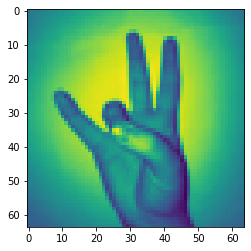

In [ ]:
# Some examples
plt.imshow(x_train[3][:,:,0])
plt.show()

###Model Training

In this assignment, specifically, we will first train a base model with some hyperparameters, and then go on to train slightly tweaked models with respect to each parameter to view the impact on the Accuracy and Loss.

The first model we will be creating as the baseline model is below:

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
# dimension of (64,64,1) is 3 because kernel requires 3 dimensions. Number "1" shows that it is used as gray scale. kernel_size means that dimension of filter. 
model = Sequential()
#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Second Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        9280      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 16, 16, 64)       

In the above model we have specified the following parameters for the Neural Network.

Architecture : 
1. First Convolutional Layer: 8 nodes, kernel size of (5,5). The activation function used is ReLU - Rectified Linear Unit. Padding is set to the value of "Same" which means Zero padding will be used. Strides is set to the default value of (1,1) and the kernel initializer is also set to the default value of "glorot_uniform". Since this is the first layer, we have also specified the input shape as (64,64,1). This layer has a Pooling layer with a MaxPool2D function implented with a pool size of (2,2). Dropout of 25% is added.

2. Second convolutional layer: 16 nodes, Kernel Size of (3,3), the padding and activation functions are the same and the other hyperparameters stay as the default value. This layer also uses a pooling layer with MaxPool algorithm with pool size of (2,2) and strides of (2,2). Dropout is same as previous layer at 25%.

3. Flatten Layer before the fully connected layer

4. Dense layer with 256 nodes and activation function of reLU. Dropout is set at 50%.

5. Dense layer with 10 nodes and Softmax activation function. This keeps the values for this layer between 0 and 1, and can be used as class probabilities for each of our 10 classes.

In [ ]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


The optimizer is set as Adam with a learning rate of 0.001.
The next step is to compile the model.
We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.
To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

In [ ]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

The number of epochs for our model is set to 100 and we will use the default batch size of 32 while training our model.

In [ ]:
baseline_model = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
55/55 [==============================] - 11s 189ms/step - loss: 2.2555 - accuracy: 0.1610 - val_loss: 1.9310 - val_accuracy: 0.4097
Epoch 2/100
55/55 [==============================] - 10s 186ms/step - loss: 1.4734 - accuracy: 0.4937 - val_loss: 1.0796 - val_accuracy: 0.6645
Epoch 3/100
55/55 [==============================] - 10s 187ms/step - loss: 0.9871 - accuracy: 0.6701 - val_loss: 0.8237 - val_accuracy: 0.7484
Epoch 4/100
55/55 [==============================] - 10s 185ms/step - loss: 0.8148 - accuracy: 0.7306 - val_loss: 0.6981 - val_accuracy: 0.7548
Epoch 5/100
55/55 [==============================] - 10s 187ms/step - loss: 0.7325 - accuracy: 0.7631 - val_loss: 0.5983 - val_accuracy: 0.8065
Epoch 6/100
55/55 [==============================] - 10s 188ms/step - loss: 0.6572 - accuracy: 0.7705 - val_loss: 0.5676 - val_accuracy: 0.7871
Epoch 7/100
55/55 [==============================] - 10s 186ms/step - loss: 0.5961 - accuracy: 0.7894 - val_loss: 0.5670 - val_accuracy:

Our baseline model is giving us a training accuracy of 98.23% and a validation accuracy of 90.97%. This may indicate overfitting.

Additionally, our model has reduced training loss to 5.2% and validation loss to 32.77%.

Let's visualize the change and plateuing of the validation loss and accuracy over the 100 epochs.

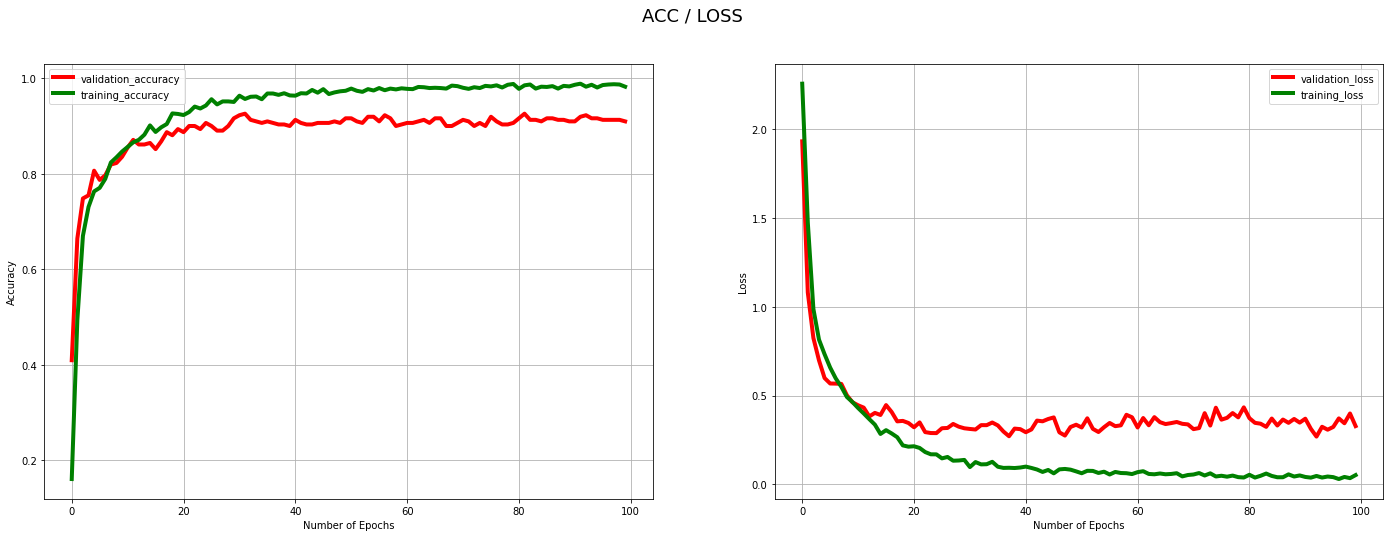

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(baseline_model.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(baseline_model.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(baseline_model.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(baseline_model.history["loss"], label="training_loss", c="green", linewidth=4)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.grid(True)

plt.suptitle("Accuracy and Loss of Baseline Model",fontsize=18)

plt.show()

It is clearly visible that the validation accuracy and validation loss are worse than the training accuracy and training loss and this indicates overfitting. We can take a look if this can be improved in consequent attempts to tweak this baseline model.

###Changing Network Architecture

We will change network architecture by add two more Convolutional Layers as below and take a look at how that affects Accuracy and Loss.

In [ ]:
#model creating

model= Sequential()

# Convolutional layer 1

model.add(Conv2D(filters=16, kernel_size=(5,5), padding ="Same", activation= "relu", input_shape=(64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Convolutional Layer 2

model.add(Conv2D(filters=64, kernel_size=(3,3), padding ="Same", activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Dropout(0.25))

# Convolutional Layer 3

model.add(Conv2D(filters=16, kernel_size=(3,3), padding ="Same", activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Dropout(0.25))

# Convolutional Layer 4

model.add(Conv2D(filters=16, kernel_size=(3,3), padding ="Same", activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Dropout(0.25))

# Fully Connected Layers

model.add(Flatten())
model.add(Dense(256, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation= "softmax"))

optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_new_architecture = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
55/55 [==============================] - 11s 189ms/step - loss: 2.3088 - accuracy: 0.0987 - val_loss: 2.3040 - val_accuracy: 0.0968
Epoch 2/100
55/55 [==============================] - 10s 185ms/step - loss: 2.3026 - accuracy: 0.1136 - val_loss: 2.2987 - val_accuracy: 0.1516
Epoch 3/100
55/55 [==============================] - 10s 184ms/step - loss: 2.0749 - accuracy: 0.2494 - val_loss: 1.3840 - val_accuracy: 0.5452
Epoch 4/100
55/55 [==============================] - 10s 185ms/step - loss: 1.3626 - accuracy: 0.5274 - val_loss: 0.8862 - val_accuracy: 0.7419
Epoch 5/100
55/55 [==============================] - 10s 186ms/step - loss: 1.0779 - accuracy: 0.6147 - val_loss: 0.6962 - val_accuracy: 0.7806
Epoch 6/100
55/55 [==============================] - 10s 186ms/step - loss: 0.8986 - accuracy: 0.6792 - val_loss: 0.5387 - val_accuracy: 0.8226
Epoch 7/100
55/55 [==============================] - 10s 186ms/step - loss: 0.7890 - accuracy: 0.7386 - val_loss: 0.4483 - val_accuracy:

Our updated model with additional convolutional layers is giving us a training accuracy of 97.72% and a validation accuracy of 97.10%. We can see that the validation accuracy is on par with the training accuracy and the earlier noticed issue of overfitting is not evident anymore.

Additionally, our model has reduced training loss to 6.2% and validation loss to 7.72%.This is a significant improvement over the previous validation loss of 32.77%.

Lets visualize this in comparison to the previous accuracy and loss.

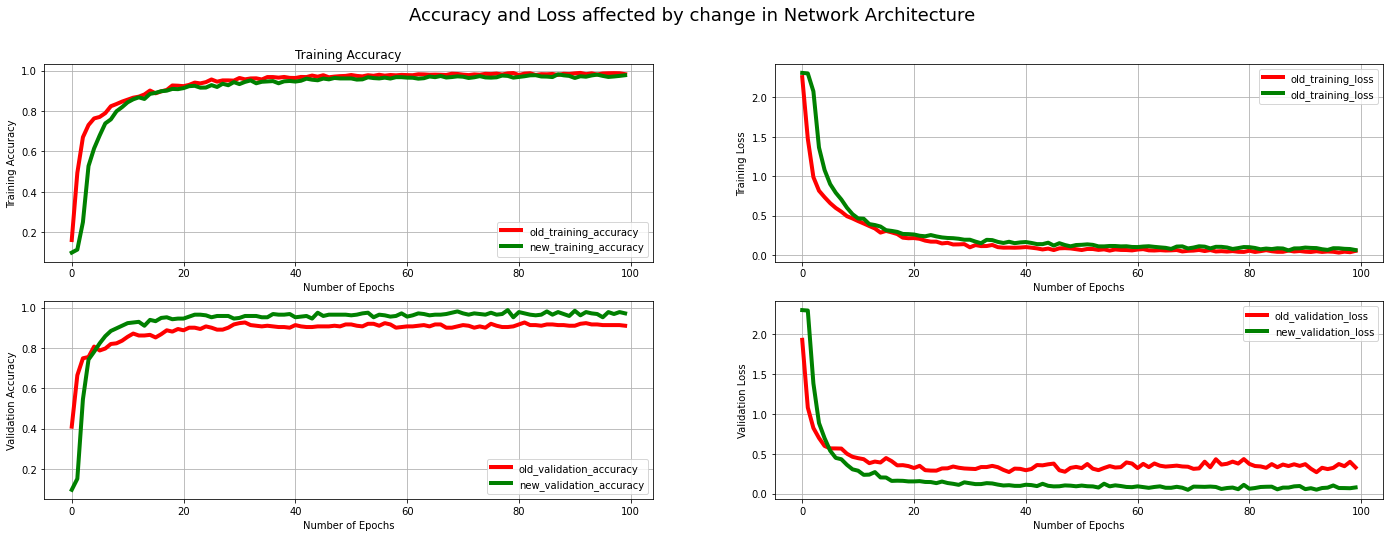

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,8))
fig.suptitle("Accuracy and Loss affected by change in Network Architecture",fontsize=18)
#plt.figure(figsize=(100,50))

#plt.subplot(0,0)
ax1.plot(baseline_model.history["accuracy"], label="old_training_accuracy", c="red", linewidth=4)
ax1.plot(model_new_architecture.history["accuracy"], label="new_training_accuracy", c="green", linewidth=4)
ax1.legend()
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Training Accuracy")
ax1.grid(True)

#ax2.subplot(0,1)
ax2.plot(baseline_model.history["loss"], label="old_training_loss", c="red", linewidth=4)
ax2.plot(model_new_architecture.history["loss"], label="old_training_loss", c="green", linewidth=4)
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Training Loss")
ax2.legend()
ax2.grid(True)

#ax3.subplot(1,0)
ax3.plot(baseline_model.history["val_accuracy"], label="old_validation_accuracy", c="red", linewidth=4)
ax3.plot(model_new_architecture.history["val_accuracy"], label="new_validation_accuracy", c="green", linewidth=4)
ax3.legend()
ax3.set_xlabel("Number of Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True)

#plt.subplot(1,1)
ax4.plot(baseline_model.history["val_loss"], label="old_validation_loss", c="red", linewidth=4)
ax4.plot(model_new_architecture.history["val_loss"], label="new_validation_loss", c="green", linewidth=4)
ax4.set_xlabel("Number of Epochs")
ax4.set_ylabel("Validation Loss")
ax4.legend()
ax4.grid(True)


plt.show()

We can see that in terms of training loss and training accuracy, both our models behave somewhat similar in terms of plateauing. 
However, in Validation loss and validation accuracy, our new more achieves higher accuracy and lower loss and behaves overall better. The plateau is around 25-30 epochs and then the values of all the metrics stay somewhat same in both the models.

###Changing the network initialization

The baseline model's network initialization was set to the keras default of "glorot uniform". We will now change it to zeros and see how that affects the accuracy and loss of our neural network.

In [ ]:
import tensorflow as tf
initializer=tf.keras.initializers.Zeros()

In [ ]:
# dimension of (64,64,1) is 3 because kernel requires 3 dimensions. Number "1" shows that it is used as gray scale. kernel_size means that dimension of filter. 
model = Sequential()
#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer=initializer, input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Second Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),kernel_initializer=initializer,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu",kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax",kernel_initializer=initializer))
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_zero_initialized = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

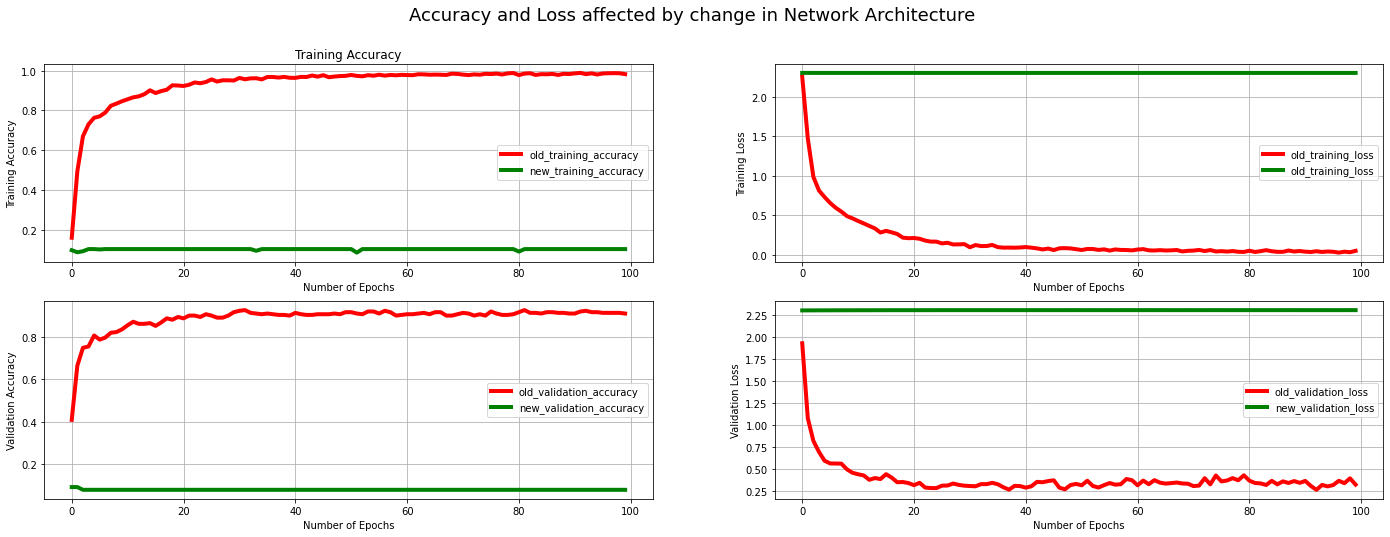

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,8))
fig.suptitle("Accuracy and Loss affected by change in Network Initialization",fontsize=18)

ax1.plot(baseline_model.history["accuracy"], label="old_training_accuracy", c="red", linewidth=4)
ax1.plot(model_zero_initialized.history["accuracy"], label="new_training_accuracy", c="green", linewidth=4)
ax1.legend()
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Training Accuracy")
ax1.grid(True)

ax2.plot(baseline_model.history["loss"], label="old_training_loss", c="red", linewidth=4)
ax2.plot(model_zero_initialized.history["loss"], label="old_training_loss", c="green", linewidth=4)
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Training Loss")
ax2.legend()
ax2.grid(True)


ax3.plot(baseline_model.history["val_accuracy"], label="old_validation_accuracy", c="red", linewidth=4)
ax3.plot(model_zero_initialized.history["val_accuracy"], label="new_validation_accuracy", c="green", linewidth=4)
ax3.legend()
ax3.set_xlabel("Number of Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True)


ax4.plot(baseline_model.history["val_loss"], label="old_validation_loss", c="red", linewidth=4)
ax4.plot(model_zero_initialized.history["val_loss"], label="new_validation_loss", c="green", linewidth=4)
ax4.set_xlabel("Number of Epochs")
ax4.set_ylabel("Validation Loss")
ax4.legend()
ax4.grid(True)


plt.show()

As expected, the neural network initialized with zeroes is performing horribly in terms of all our metrics. The network stays at a relative constant value for training loss and validation loss which is both high. Training and Validation accuracy are relatively constant and is very low. 

Additionally, an interesting observation is that although the neural network is supposed to adjust weights throughout the epochs and improve accuracy and reduce loss, the neural network initialized with zero is improving very little or not at all. This indicates that Network Initialization has a very important role to play in Convolutional Neural Networks.

###Number of Epochs

We will now attempt to reduce the number of epochs from 100 to 25, and see how that affects the accuracy and loss of our model.

In [ ]:
model = Sequential()
#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Second Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_less_epochs = model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
55/55 [==============================] - 12s 200ms/step - loss: 2.3711 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0806
Epoch 2/25
55/55 [==============================] - 11s 197ms/step - loss: 2.3003 - accuracy: 0.1124 - val_loss: 2.2982 - val_accuracy: 0.1097
Epoch 3/25
55/55 [==============================] - 11s 197ms/step - loss: 2.2562 - accuracy: 0.1604 - val_loss: 2.1427 - val_accuracy: 0.4161
Epoch 4/25
55/55 [==============================] - 11s 198ms/step - loss: 1.7320 - accuracy: 0.4224 - val_loss: 1.1524 - val_accuracy: 0.6806
Epoch 5/25
55/55 [==============================] - 11s 198ms/step - loss: 1.1528 - accuracy: 0.5987 - val_loss: 0.7901 - val_accuracy: 0.7613
Epoch 6/25
55/55 [==============================] - 11s 196ms/step - loss: 0.8752 - accuracy: 0.7003 - val_loss: 0.6653 - val_accuracy: 0.8032
Epoch 7/25
55/55 [==============================] - 11s 196ms/step - loss: 0.8153 - accuracy: 0.7135 - val_loss: 0.6405 - val_accuracy: 0.8000

Our updated model with less number of epochs is giving us a training accuracy of 91.55% and a validation accuracy of 90.65%. Although the Validation accuracy isn't much lower, the training accuracy has gone down quite a bit from 98.23% in our baseline model.

Additionally, our model has a training loss to 23.11% and validation loss to 29.37%. This is considerable higher compared to our baseline model metrics.

Lets visualize this in comparison to the previous accuracy and loss.

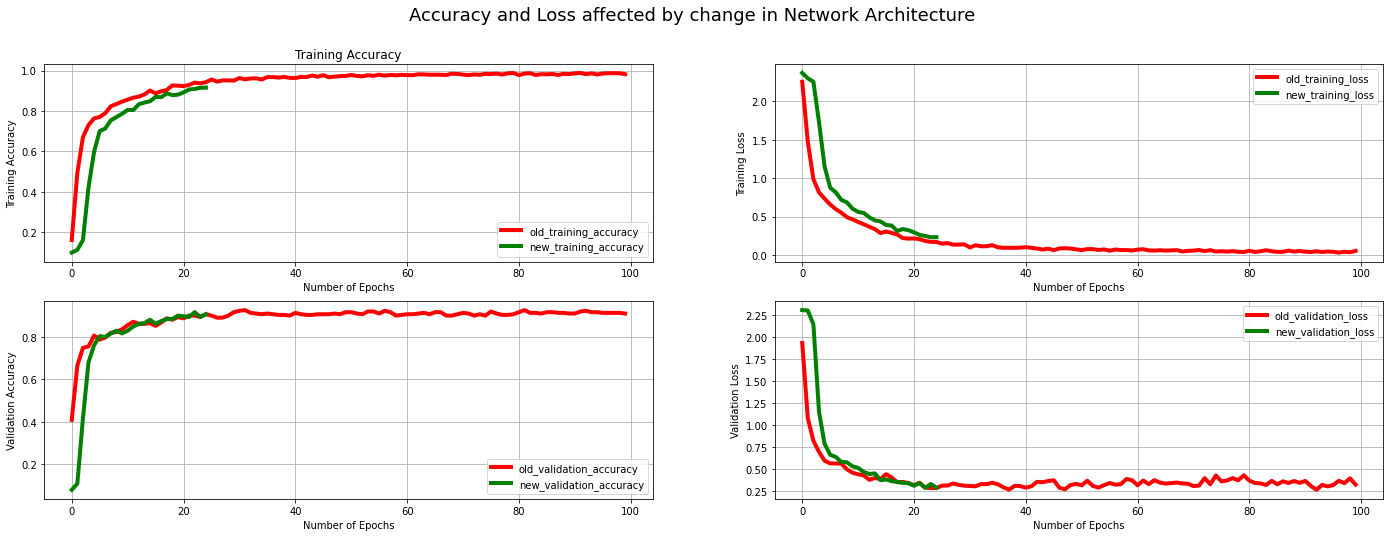

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,8))
fig.suptitle("Accuracy and Loss affected by change in Number of Epochs",fontsize=18)

ax1.plot(baseline_model.history["accuracy"], label="old_training_accuracy", c="red", linewidth=4)
ax1.plot(model_less_epochs.history["accuracy"], label="new_training_accuracy", c="green", linewidth=4)
ax1.legend()
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Training Accuracy")
ax1.grid(True)

ax2.plot(baseline_model.history["loss"], label="old_training_loss", c="red", linewidth=4)
ax2.plot(model_less_epochs.history["loss"], label="new_training_loss", c="green", linewidth=4)
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Training Loss")
ax2.legend()
ax2.grid(True)


ax3.plot(baseline_model.history["val_accuracy"], label="old_validation_accuracy", c="red", linewidth=4)
ax3.plot(model_less_epochs.history["val_accuracy"], label="new_validation_accuracy", c="green", linewidth=4)
ax3.legend()
ax3.set_xlabel("Number of Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True)


ax4.plot(baseline_model.history["val_loss"], label="old_validation_loss", c="red", linewidth=4)
ax4.plot(model_less_epochs.history["val_loss"], label="new_validation_loss", c="green", linewidth=4)
ax4.set_xlabel("Number of Epochs")
ax4.set_ylabel("Validation Loss")
ax4.legend()
ax4.grid(True)


plt.show()

We can clearly see the impact the epochs have on the metrics. 

The training accuracy, is climbing up and does not quite reach the value that we see for the baseline model. The training loss is trending down but does not reach the plateau value we saw for the baseline model. This indicates that this model would have benefitted from some more epochs.Had the number of epochs been around 35-40, we would have reached the plateau of training accuracy and training loss.

Validation accuracy and validation loss however are very similar. This is because the plateau of both of those in the baseline model is achieved around epoch 25, and hence the model with lesser epochs is also getting validation accuracy and loss metrics close the plateau values.

###Changing Activation Function

We will change the activation function to LeakyReLU from the baseline version of ReLU and see how it affects the metrics of the neural network.


In [ ]:
import keras.layers.advanced_activations as kradv
activationfn=kradv.LeakyReLU(alpha=0.3)

In [ ]:
model = Sequential()
#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation =activationfn, input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Second Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation =activationfn))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = activationfn))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_leakyRELU = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
55/55 [==============================] - 11s 206ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.6355 - val_accuracy: 0.9000
Epoch 2/100
55/55 [==============================] - 11s 206ms/step - loss: 0.0070 - accuracy: 0.9971 - val_loss: 0.5570 - val_accuracy: 0.9290
Epoch 3/100
55/55 [==============================] - 11s 203ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.5252 - val_accuracy: 0.9258
Epoch 4/100
55/55 [==============================] - 11s 204ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.5747 - val_accuracy: 0.9032
Epoch 5/100
55/55 [==============================] - 11s 205ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.6810 - val_accuracy: 0.9129
Epoch 6/100
55/55 [==============================] - 11s 205ms/step - loss: 0.0148 - accuracy: 0.9943 - val_loss: 0.5688 - val_accuracy: 0.9258
Epoch 7/100
55/55 [==============================] - 11s 205ms/step - loss: 0.0407 - accuracy: 0.9886 - val_loss: 0.5622 - val_accuracy:

Our updated model with the new activation function of Leaky Rectified Linear Unit is giving us a training accuracy of 99.20% and a validation accuracy of 90.97%. We can see that the validation accuracy is on par with the previous validation accuracy but the training accuracy has seen significant improvement. 

Additionally, our model has reduced training loss to 4.01% but increased validation loss significantly to 96.95% this clearly indicates overfitting and we can conclude that LeakyRelU has made the model more flexible and overfitting to the training data.

Lets visualize this in comparison to the baselines accuracy and loss.

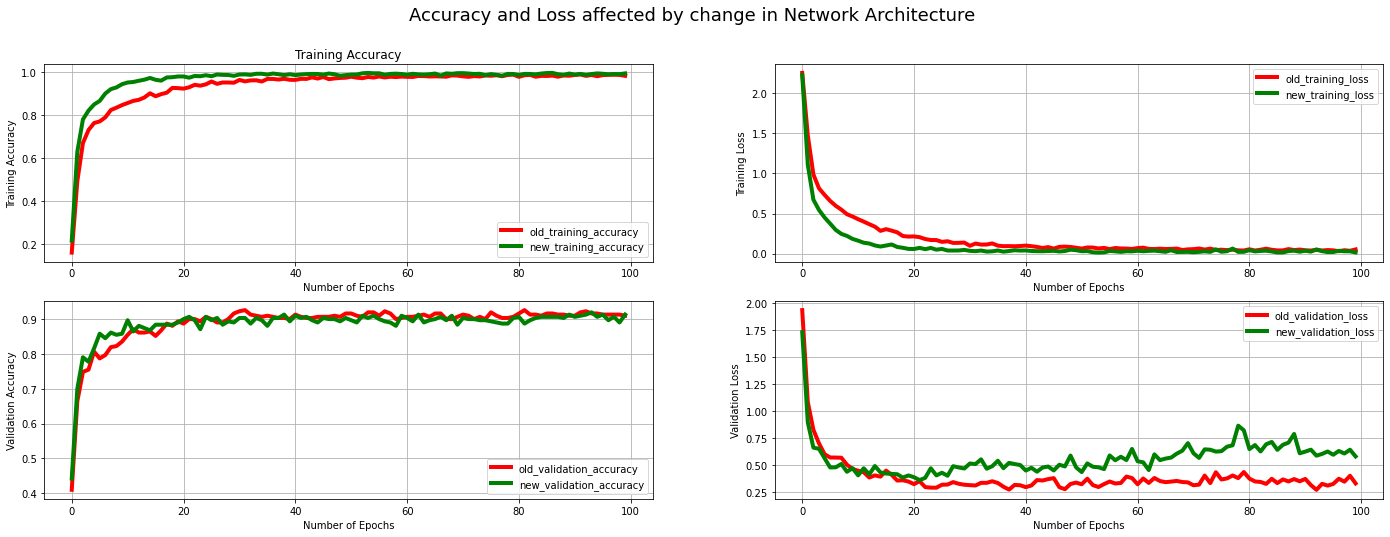

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,8))
fig.suptitle("Accuracy and Loss affected by change in Activation Function",fontsize=18)

ax1.plot(baseline_model.history["accuracy"], label="old_training_accuracy", c="red", linewidth=4)
ax1.plot(model_leakyRELU.history["accuracy"], label="new_training_accuracy", c="green", linewidth=4)
ax1.legend()
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Training Accuracy")
ax1.grid(True)

ax2.plot(baseline_model.history["loss"], label="old_training_loss", c="red", linewidth=4)
ax2.plot(model_leakyRELU.history["loss"], label="new_training_loss", c="green", linewidth=4)
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Training Loss")
ax2.legend()
ax2.grid(True)


ax3.plot(baseline_model.history["val_accuracy"], label="old_validation_accuracy", c="red", linewidth=4)
ax3.plot(model_leakyRELU.history["val_accuracy"], label="new_validation_accuracy", c="green", linewidth=4)
ax3.legend()
ax3.set_xlabel("Number of Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True)


ax4.plot(baseline_model.history["val_loss"], label="old_validation_loss", c="red", linewidth=4)
ax4.plot(model_leakyRELU.history["val_loss"], label="new_validation_loss", c="green", linewidth=4)
ax4.set_xlabel("Number of Epochs")
ax4.set_ylabel("Validation Loss")
ax4.legend()
ax4.grid(True)


plt.show()

The new activation function overall achieves higher values of Training and validation accuracy faster, and with lesser number of epochs. The final values of both of these are very similar to the baseline model, but Leaky ReLU achieves the plateau in lesser number of epochs.

As for training loss, we observe similar trend as above, but validation loss increases trendingly after about 20 epochs and doesn't quite plateau in this case. The increasing validation loss indicates overfitting.

Had our baseline model been the non-overfitting version with more convolutional layers, I think the LeakyReLU combined with the extra convolutional layers would've improved the model considerably.

###Changing Cost Function

The current Cost function is Categorical cross entropy. We will see how changing the cost function affects the metrics of the neural network.
We will use another cost function used for multi-class classification called kullback_leibler_divergence.

In [ ]:
model = Sequential()
#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Second Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = "kullback_leibler_divergence", metrics=["accuracy"])

In [ ]:
model_different_LossFn = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
55/55 [==============================] - 11s 196ms/step - loss: 1.3247 - accuracy: 0.5514 - val_loss: 0.9262 - val_accuracy: 0.7355
Epoch 2/100
55/55 [==============================] - 11s 202ms/step - loss: 1.0630 - accuracy: 0.6495 - val_loss: 0.8255 - val_accuracy: 0.7903
Epoch 3/100
55/55 [==============================] - 11s 199ms/step - loss: 0.8717 - accuracy: 0.7061 - val_loss: 0.6977 - val_accuracy: 0.7774
Epoch 4/100
55/55 [==============================] - 11s 201ms/step - loss: 0.7518 - accuracy: 0.7403 - val_loss: 0.5842 - val_accuracy: 0.8161
Epoch 5/100
55/55 [==============================] - 11s 196ms/step - loss: 0.6836 - accuracy: 0.7877 - val_loss: 0.5642 - val_accuracy: 0.8387
Epoch 6/100
55/55 [==============================] - 11s 198ms/step - loss: 0.6054 - accuracy: 0.7894 - val_loss: 0.5255 - val_accuracy: 0.8258
Epoch 7/100
55/55 [==============================] - 11s 197ms/step - loss: 0.5991 - accuracy: 0.8042 - val_loss: 0.4859 - val_accuracy:

Our updated model with kullback_leibler_divergence as the cost function is giving us a training accuracy of 97.32% and a validation accuracy of 92.58%. We can see that the validation accuracy is slightly higher than the baseline validation accuracy of 90.97% but the training accuracy has come down from the earlier value of 98.23%.

Additionally, our model has brought training loss to 7.83% and validation loss to 26.43%.This is an improvement over the previous validation loss of 32.77%.

Lets visualize this in comparison to the baseline accuracy and loss.

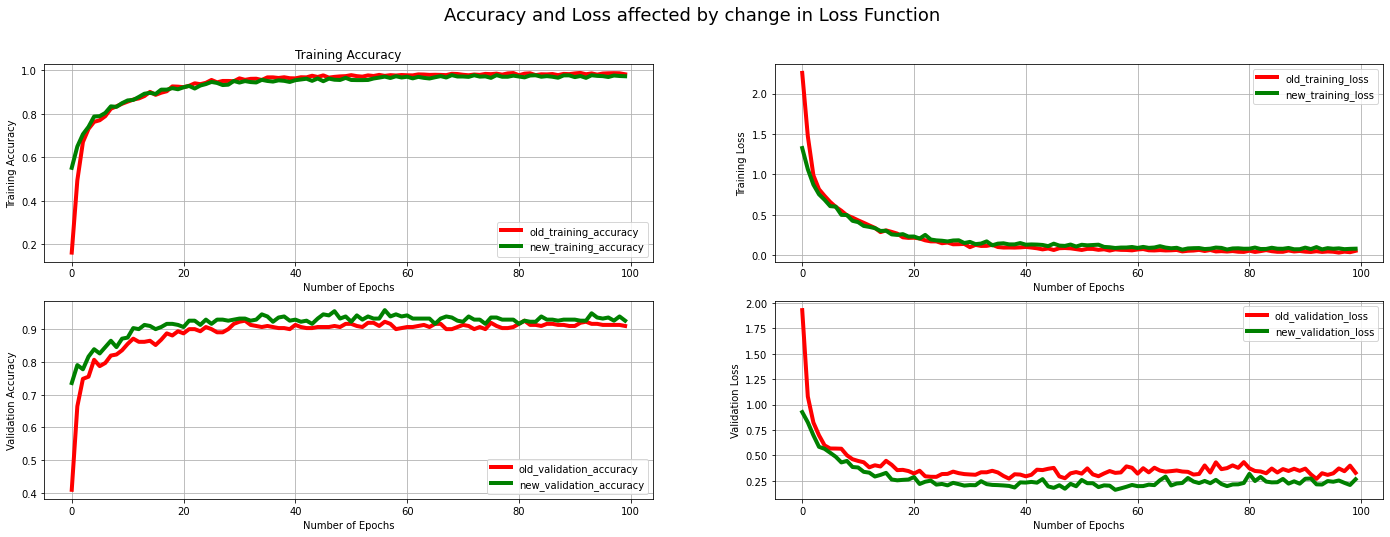

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,8))
fig.suptitle("Accuracy and Loss affected by change in Loss Function",fontsize=18)

ax1.plot(baseline_model.history["accuracy"], label="old_training_accuracy", c="red", linewidth=4)
ax1.plot(model_different_LossFn.history["accuracy"], label="new_training_accuracy", c="green", linewidth=4)
ax1.legend()
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Training Accuracy")
ax1.grid(True)

ax2.plot(baseline_model.history["loss"], label="old_training_loss", c="red", linewidth=4)
ax2.plot(model_different_LossFn.history["loss"], label="new_training_loss", c="green", linewidth=4)
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Training Loss")
ax2.legend()
ax2.grid(True)


ax3.plot(baseline_model.history["val_accuracy"], label="old_validation_accuracy", c="red", linewidth=4)
ax3.plot(model_different_LossFn.history["val_accuracy"], label="new_validation_accuracy", c="green", linewidth=4)
ax3.legend()
ax3.set_xlabel("Number of Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True)


ax4.plot(baseline_model.history["val_loss"], label="old_validation_loss", c="red", linewidth=4)
ax4.plot(model_different_LossFn.history["val_loss"], label="new_validation_loss", c="green", linewidth=4)
ax4.set_xlabel("Number of Epochs")
ax4.set_ylabel("Validation Loss")
ax4.legend()
ax4.grid(True)


plt.show()

The training accuracy for the baseline model and the new model has stayed somewhat similar and the plateau is also achieved around 30-40 epochs.

The validation accuracy curve is a wiggly one, but almost stays relatively constant post 35-40 epochs.

The nere training loss is similar to baseline training loss, but baseline training loss achieves plateau a couple epochs earlier than the kullback leibler divergence cost function. The similar trend is observed for validation loss, but with kullback leiber divergence, the validation loss is overall lower than the baseline model.

###Changing Gradient Estimation

We will change the model to use SGD as the Gradient Estimation as opposed to Adam and see how that affects the accuracy and loss of the model.

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,nesterov=True)

In [ ]:
model = Sequential()
#First Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Second Convolutional Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
optimizer = opt
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_SGD = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
55/55 [==============================] - 11s 198ms/step - loss: 2.3191 - accuracy: 0.1022 - val_loss: 2.3062 - val_accuracy: 0.0935
Epoch 2/100
55/55 [==============================] - 11s 192ms/step - loss: 2.3032 - accuracy: 0.1056 - val_loss: 2.3018 - val_accuracy: 0.1065
Epoch 3/100
55/55 [==============================] - 11s 193ms/step - loss: 2.2996 - accuracy: 0.1073 - val_loss: 2.2992 - val_accuracy: 0.0935
Epoch 4/100
55/55 [==============================] - 11s 193ms/step - loss: 2.2965 - accuracy: 0.1279 - val_loss: 2.2947 - val_accuracy: 0.1194
Epoch 5/100
55/55 [==============================] - 11s 194ms/step - loss: 2.2890 - accuracy: 0.1358 - val_loss: 2.2893 - val_accuracy: 0.1419
Epoch 6/100
55/55 [==============================] - 11s 194ms/step - loss: 2.2881 - accuracy: 0.1330 - val_loss: 2.2837 - val_accuracy: 0.1968
Epoch 7/100
55/55 [==============================] - 11s 195ms/step - loss: 2.2791 - accuracy: 0.1592 - val_loss: 2.2763 - val_accuracy:

Our updated model with SGD as an optimizer in place of Adam is giving us a training accuracy of 97.37% and a validation accuracy of only 89.68%. We can see that the training accuracy is on par with baseline training accuracy but the validation accuracy has come further down from 90.67% . This is expected since upon research, Adam is considered a better Gradient Optimizer as compared to SGD.

Additionally, our model has upped training loss to 8.06% and validation loss to 37.38% which is higher than the baseline validation loss by around 5%.

Lets visualize this in comparison to the previous accuracy and loss.

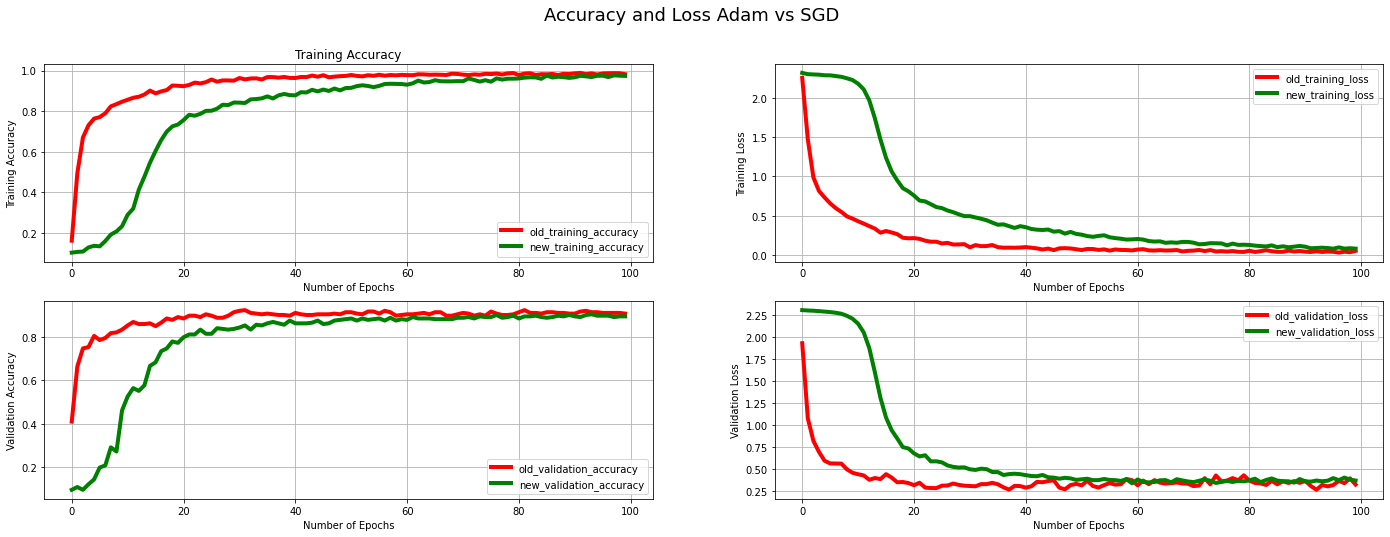

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(24,8))
fig.suptitle("Accuracy and Loss Adam vs SGD",fontsize=18)

ax1.plot(baseline_model.history["accuracy"], label="old_training_accuracy", c="red", linewidth=4)
ax1.plot(model_SGD.history["accuracy"], label="new_training_accuracy", c="green", linewidth=4)
ax1.legend()
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Number of Epochs")
ax1.set_ylabel("Training Accuracy")
ax1.grid(True)

ax2.plot(baseline_model.history["loss"], label="old_training_loss", c="red", linewidth=4)
ax2.plot(model_SGD.history["loss"], label="new_training_loss", c="green", linewidth=4)
ax2.set_xlabel("Number of Epochs")
ax2.set_ylabel("Training Loss")
ax2.legend()
ax2.grid(True)


ax3.plot(baseline_model.history["val_accuracy"], label="old_validation_accuracy", c="red", linewidth=4)
ax3.plot(model_SGD.history["val_accuracy"], label="new_validation_accuracy", c="green", linewidth=4)
ax3.legend()
ax3.set_xlabel("Number of Epochs")
ax3.set_ylabel("Validation Accuracy")
ax3.grid(True)


ax4.plot(baseline_model.history["val_loss"], label="old_validation_loss", c="red", linewidth=4)
ax4.plot(model_SGD.history["val_loss"], label="new_validation_loss", c="green", linewidth=4)
ax4.set_xlabel("Number of Epochs")
ax4.set_ylabel("Validation Loss")
ax4.legend()
ax4.grid(True)


plt.show()

As we can see, In terms of training and validation accuracies, although SGD and Adam arrive at similar final accuracies, the path to get there is considerably different. Adam optimizer clearly achieves the maximum accuracy with much lesser number of epochs than SGD. In fact, with training accuracy SGD has not quite plateaued and is continuing to minimally rise as the epochs increase. Maybe with few more epochs we could've seen a higher value and a plateau.

As for losses, the similar trend is observed, where SGD takes around 60 epochs to plateau validation loss as compared to Adam where the minimum loss is achieved at around 20 epochs. Training loss continues to trend downwards in SGD, and is still higher than the Adam training loss at 100 epochs.

I think, to see a clear idea of where SGD plateaus we definitely need more epochs than Adam.

##Conclusion

We have attempted to compare the performance of a Convolutional Neural Network with changes to various hyperparameters. We can conclude as below:

####1. Network Architecture:

Adding more Convolutional Layers to our model improved the accuracy and decreased the loss overall. It also decreased the overfitting that our baseline model had.
####2. Number of Epochs:

Upon reducing the number of epochs from 100 to 25, our model did not quite achieve the best possible values of accuracy or loss, but accuracy was trending upward and not plateaued. Similarly, the loss was trending downwards but not plateaued.

####3. Network Initialization:

Upon changing the network initialization from the keras default of Glorot uniform to zeros, we saw a horrible detioration of our neural network. The network barely optimized accuracy or loss once initialized with zero, and accuracy stayed constanly low and loss constantly high throughout the 100 epochs.

####4. Activation Function:

Upon changing the activation function from ReLU to Leaky ReLU, we saw better training accuracy but worse test accuracy and similar trends for loss as well. Leaky ReLU although made the model more flexible in terms of fitting the training data, it may have caused slight overfitting. Another thing to note is our baseline model itself indicated possibilites of overfitting.

####5. Cost Function :

Upon changing the cost function from categorical cross entropy to kullback leibler divergence, we saw similar training metrics as the baseline model but improvement in terms of validation metrics. We saw better validation accuracy and loss.

####6. Gradient Estimation:

We changed the Gradient Estimation function from Adam to Stochastic Gradient Descent and saw similar values of final metrics, but we saw that SGD took more number of epochs to achieve those metrics. Especially in case of validation metrics, SGD continued to trend upwards in validation accuracy and did not plateau even after 100 epcochs. As expected SGD continued to trend downwards in validation loss and did not plateau even after 100 epochs. We can conclude that Adam is a better optimizer and achieves optimized metrics in lesser number of epochs.

##Contributions

1. https://www.kaggle.com/nurullahyksel/sign-language-digits-recognition-with-cnn
2. https://www.kaggle.com/mertyiit/cnn-practice-prediction-sign-language-digits

This notebook uses ideas from the above Kernels with additional features and ideas implemented as detailed in previous sections

###References

1. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
2. https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008
3. https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
4. https://keras.io/api/layers/core_layers/activation/
5. https://keras.io/api/layers/pooling_layers/max_pooling2d/
6. https://stackoverflow.com/
7. https://faroit.com/keras-docs/1.0.8/layers/advanced-activations/
8. https://keras.io/api/layers/activation_layers/leaky_relu/
9. https://keras.io/api/optimizers/sgd/
10. https://keras.io/

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Sign Language Digits Classification using CNN.ipynb')

--2021-12-17 20:54:02--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-12-17 20:54:02 (24.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Sign Language Digits Classification using CNN.ipynb to pdf
[NbConvertApp] Support files will be in Sign Language Digits Classification using CNN_files/
[NbConvertApp] Making directory ./Sign Language Digits Classification using CNN_files
[NbConvertApp] Making directory ./Sign La

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'